In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv("train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [8]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

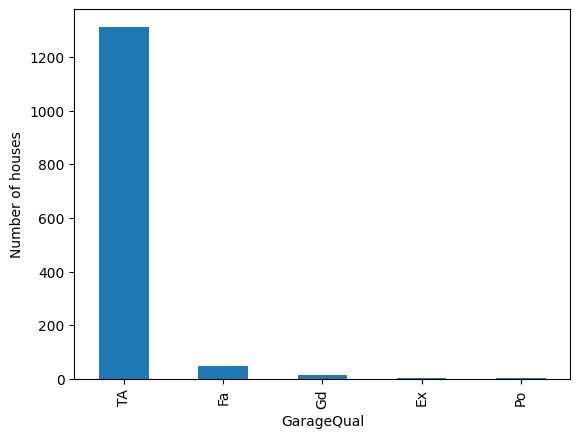

In [11]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [12]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

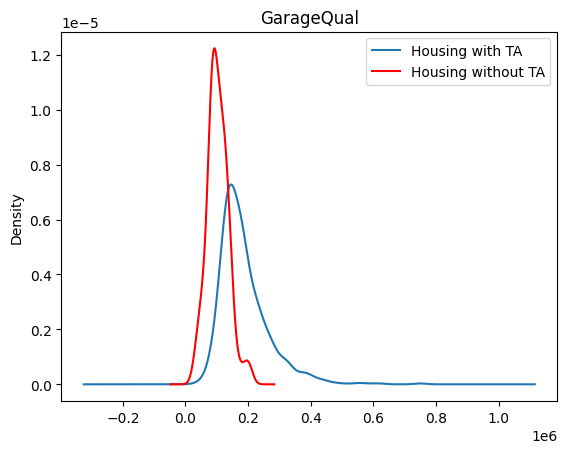

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels=['Housing with TA','Housing without TA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [16]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [17]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: >

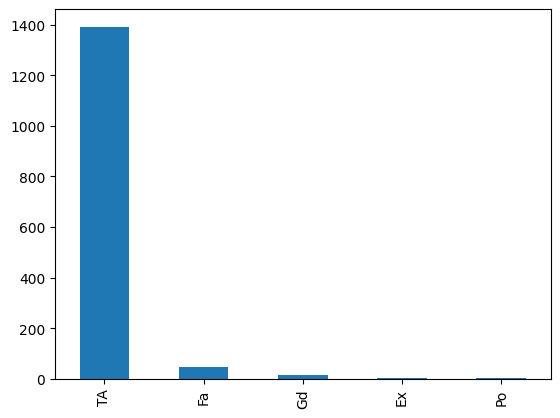

In [18]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

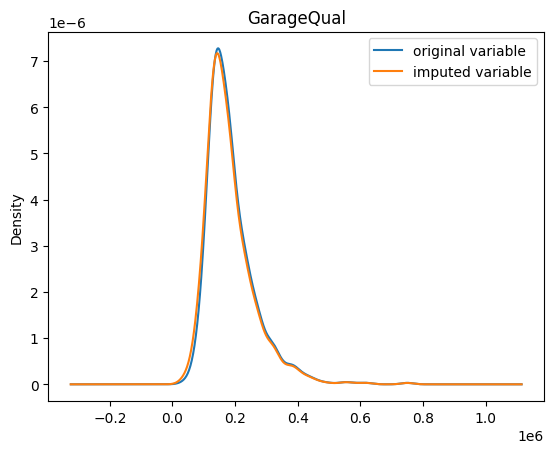

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original
temp.plot(kind='kde',ax=ax)

#distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

lines,labels = ax.get_legend_handles_labels()
labels=['original variable','imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

<Axes: >

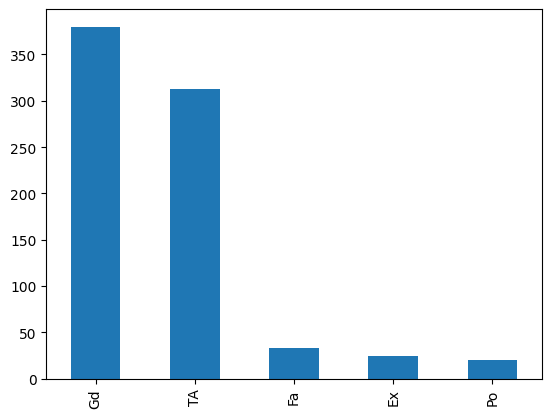

In [27]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [28]:
#here gd and TA both have same values this in might cause some 

df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

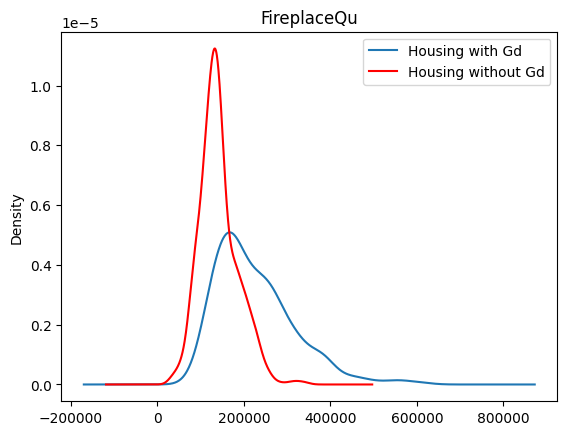

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels=['Housing with Gd','Housing without Gd']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [32]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

<Axes: >

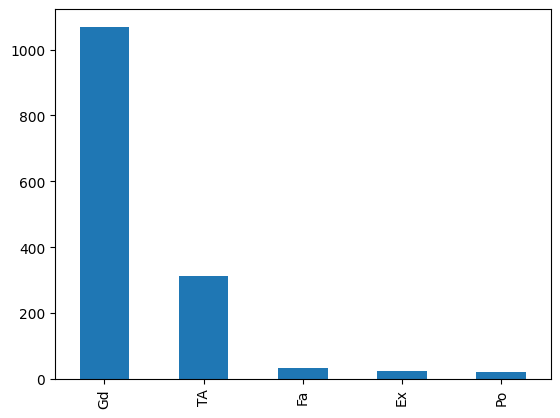

In [34]:
df['FireplaceQu'].fillna('Gd',inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

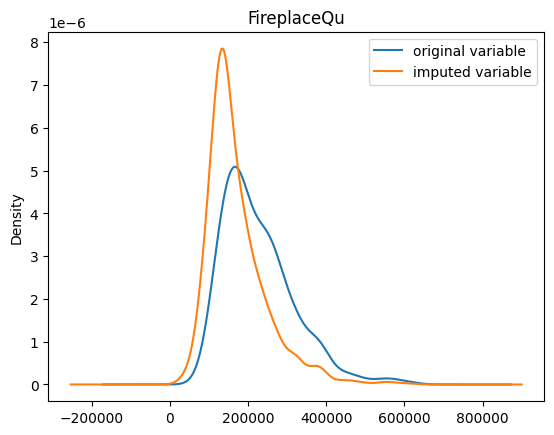

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original
temp.plot(kind='kde',ax=ax)

#distribution of the variable after imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

lines,labels = ax.get_legend_handles_labels()
labels=['original variable','imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')



# Graph of two variable in sot same because ther are multiple missing values

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [39]:
from sklearn.impute import SimpleImputer

In [41]:
imputer=SimpleImputer(strategy='most_frequent')

In [43]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

In [44]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)